In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import celltypist
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
norm_data = sc.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname06Filtered@assays$RNA@data.csv')
norm_data = norm_data.T
cell_identity = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Cell_replicate_name_Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname06Filtered (1).csv',index_col = 0)
norm_data.obs['Cell Cluster Annotation'] = cell_identity['Annotation']
norm_data.obs['Species'] = 'unassigned'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Maize')] = 'Maize'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Set')] = 'Millet'
norm_data.obs['Species'].loc[norm_data.obs_names.str.contains('Sorg')] = 'Sorghum'
norm_data.obs['Cluster and Type'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Nucl')] = norm_data.obs['Cluster and Type'] + ' Nucl'
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Cell')] = norm_data.obs['Cluster and Type'] + ' Cell'
norm_data.obs['Cluster and Species'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Maize')] = norm_data.obs['Cell Cluster Annotation'] + ' Maize'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Millet')] = norm_data.obs['Cell Cluster Annotation'] + ' Millet'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Sorghum')] = norm_data.obs['Cell Cluster Annotation'] + ' Sorghum'
norm_data.obs['Type'] = np.nan
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Nucl')] = 'Nucl'
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Cell')] = 'Cell'
norm_data.obs

/tmp/ipykernel_3453593/1926559510.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Nucl')] = 'Nucl'


,Cell Cluster Annotation,Species,Cluster and Type,Cluster and Species,Type
Maize_Cell1_AAACCTGAGAGCTTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Maize,Cell
Maize_Cell1_AAAGCAAAGAACTGTA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Maize,Cell
Maize_Cell1_AAATGCCAGTAGCCGA,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Maize,Cell
Maize_Cell1_AAATGCCCAATCTACG,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Maize,Cell
Maize_Cell1_AACTGGTAGTGACTCT,Cortex_3,Maize,Cortex_3 Cell,Cortex_3 Maize,Cell
...,...,...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Columella,Millet,Columella Nucl,Columella Millet,Nucl
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Columella,Millet,Columella Nucl,Columella Millet,Nucl
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Columella,Millet,Columella Nucl,Columella Millet,Nucl
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Columella,Millet,Columella Nucl,Columella Millet,Nucl


In [3]:
norm_data.obs['Type and Species'] = norm_data.obs['Species'] + ' '+  norm_data.obs['Type']

In [4]:
maize_cells_to_train_on = norm_data[norm_data.obs['Species'] == 'Maize', :].copy()
non_maize_cells_to_test_on = norm_data[norm_data.obs['Species'] != 'Maize', :].copy()
non_maize_cells_to_test_on

AnnData object with n_obs × n_vars = 24296 × 56381
    obs: 'Cell Cluster Annotation', 'Species', 'Cluster and Type', 'Cluster and Species', 'Type', 'Type and Species'

In [5]:
maize_based_model = celltypist.train(maize_cells_to_train_on, labels = 'Cell Cluster Annotation', n_jobs = 20, feature_selection= True)

🍳 Preparing data before training
✂️ 28728 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
🔎 Selecting features
🧬 3721 features are selected
🏋️ Starting the second round of training
🏋️ Training data using logistic regression
✅ Model training done!


In [9]:
prediction_on_non_maize = celltypist.annotate(non_maize_cells_to_test_on, model = maize_based_model, majority_voting= True)


🔬 Input data has 24296 cells and 56381 genes
🔗 Matching reference genes in the model
🧬 3735 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


In [15]:
prediction_on_non_maize.predicted_labels

,predicted_labels,over_clustering,majority_voting
Sorghum_Cell_ATAGGCTGTGACTCGC,Cortex_3,36,Cortex_2
Sorghum_Cell_CACGTGGTCGACACTA,Cortex_3,10,Pericycle
Sorghum_Cell_GACTTCCTCGCTGACG,Columella,86,Cortex_3
Sorghum_Cell_GGTTCTCGTACGCTAT,Cortex_3,86,Cortex_3
Sorghum_Cell_TTTACTGTCCCGAGAC,Cortex_3,86,Cortex_3
...,...,...,...
Set_Nuclei_2_TCACATTCAAGACGAC-1,Xylem,65,Cortex_3
Set_Nuclei_2_TCACGGGTCTTTCAGT-1,Cortex_3,31,Cortex_3
Set_Nuclei_2_TCGAACACAGTTGAAA-1,Cortex_3,93,Cortex_3
Set_Nuclei_2_TCGTCCACACTGCGTG-1,Xylem,42,Cortex_3


In [35]:
non_maize_cells_to_test_on.obs = non_maize_cells_to_test_on.obs.merge(right = prediction_on_non_maize.predicted_labels, left_index= True, right_index= True)
non_maize_cells_to_test_on.obs['Correct Predicted Labels'] = (non_maize_cells_to_test_on.obs['Cell Cluster Annotation'] == non_maize_cells_to_test_on.obs['predicted_labels'])
non_maize_cells_to_test_on.obs['Correct Majority Voting Labels'] = (non_maize_cells_to_test_on.obs['Cell Cluster Annotation'] == non_maize_cells_to_test_on.obs['majority_voting'])
non_maize_results_predicted = pd.DataFrame(non_maize_cells_to_test_on.obs.groupby('Cluster and Species')['Correct Predicted Labels'].mean())
non_maize_results_predicted = non_maize_results_predicted.reset_index()
non_maize_results_predicted['Species'] = non_maize_results_predicted['Cluster and Species'].str.split(" ").str[1]
non_maize_results_predicted['Original Cell Type'] = non_maize_results_predicted['Cluster and Species'].str.split(" ").str[0]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Columella'),
  Text(1, 0, 'Cortex_1'),
  Text(2, 0, 'Cortex_2'),
  Text(3, 0, 'Cortex_3'),
  Text(4, 0, 'Cortex_4'),
  Text(5, 0, 'Endodermis'),
  Text(6, 0, 'Epidermis_2'),
  Text(7, 0, 'Epidermis_3'),
  Text(8, 0, 'Initials'),
  Text(9, 0, 'Pericycle'),
  Text(10, 0, 'Stele'),
  Text(11, 0, 'Trichoblast'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Stele_1'),
  Text(14, 0, 'Young_Stele_2'),
  Text(15, 0, 'Young_endodermis')])

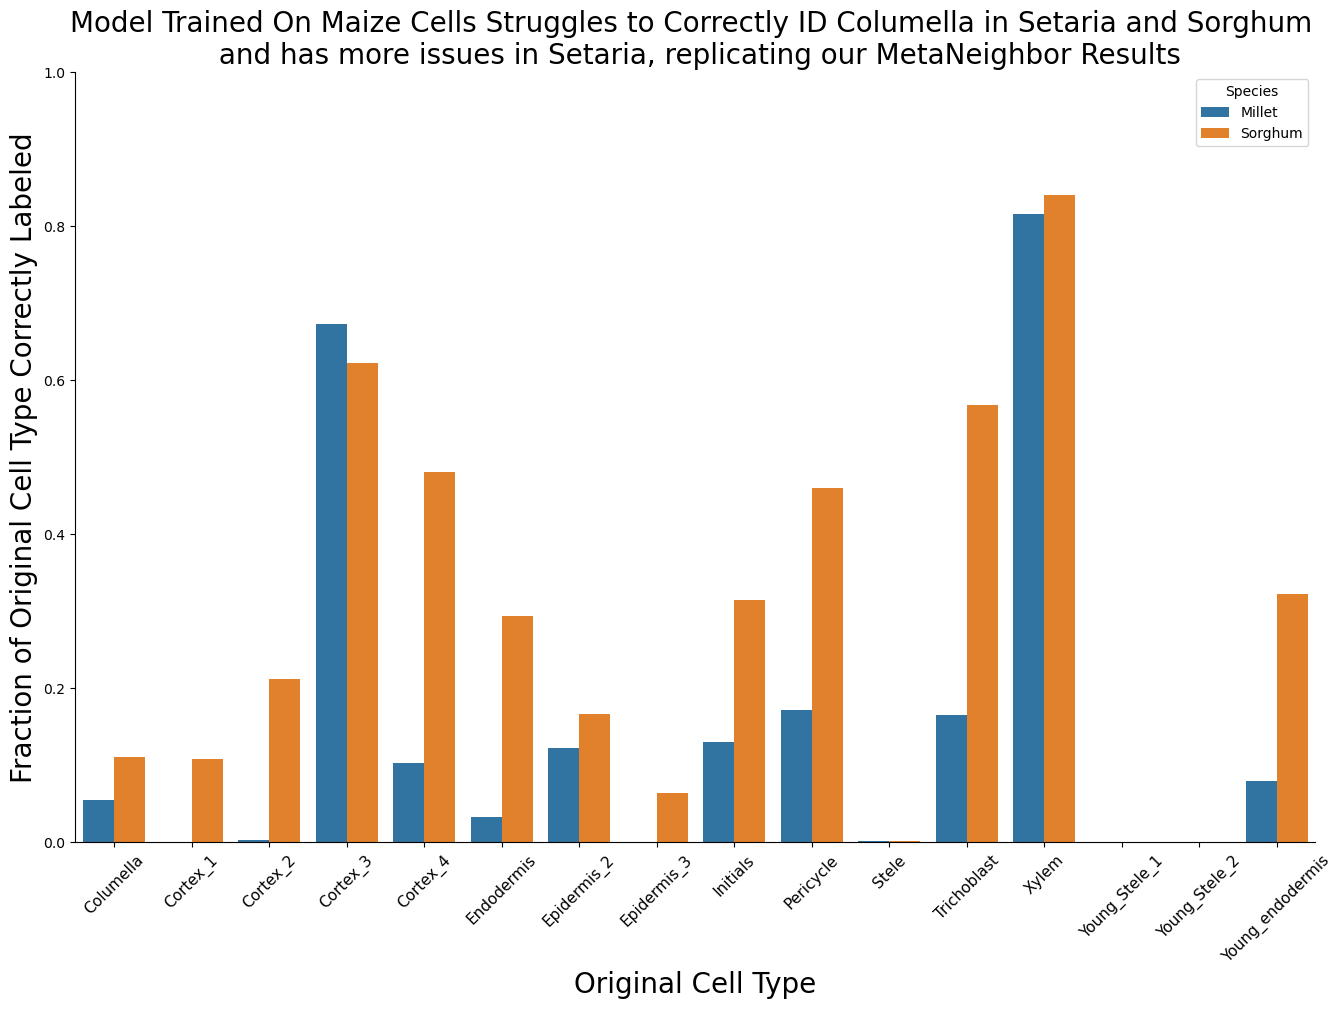

In [80]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.barplot(data = non_maize_results_predicted, x = 'Original Cell Type', y = 'Correct Predicted Labels', hue = 'Species')
plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("Original Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
plt.ylim((0, 1))
plt.title("Model Trained On Maize Cells Struggles to Correctly ID Columella in Setaria and Sorghum \n and has more issues in Setaria, replicating our MetaNeighbor Results", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)

In [63]:
non_maize_results_majority = pd.DataFrame(non_maize_cells_to_test_on.obs.groupby('Cluster and Species')['Correct Majority Voting Labels'].mean())
non_maize_results_majority = non_maize_results_majority.reset_index()
non_maize_results_majority['Species'] = non_maize_results_majority['Cluster and Species'].str.split(" ").str[1]
non_maize_results_majority['Original Cell Type'] = non_maize_results_majority['Cluster and Species'].str.split(" ").str[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Columella'),
  Text(1, 0, 'Cortex_1'),
  Text(2, 0, 'Cortex_2'),
  Text(3, 0, 'Cortex_3'),
  Text(4, 0, 'Cortex_4'),
  Text(5, 0, 'Endodermis'),
  Text(6, 0, 'Epidermis_2'),
  Text(7, 0, 'Epidermis_3'),
  Text(8, 0, 'Initials'),
  Text(9, 0, 'Pericycle'),
  Text(10, 0, 'Stele'),
  Text(11, 0, 'Trichoblast'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Stele_1'),
  Text(14, 0, 'Young_Stele_2'),
  Text(15, 0, 'Young_endodermis')])

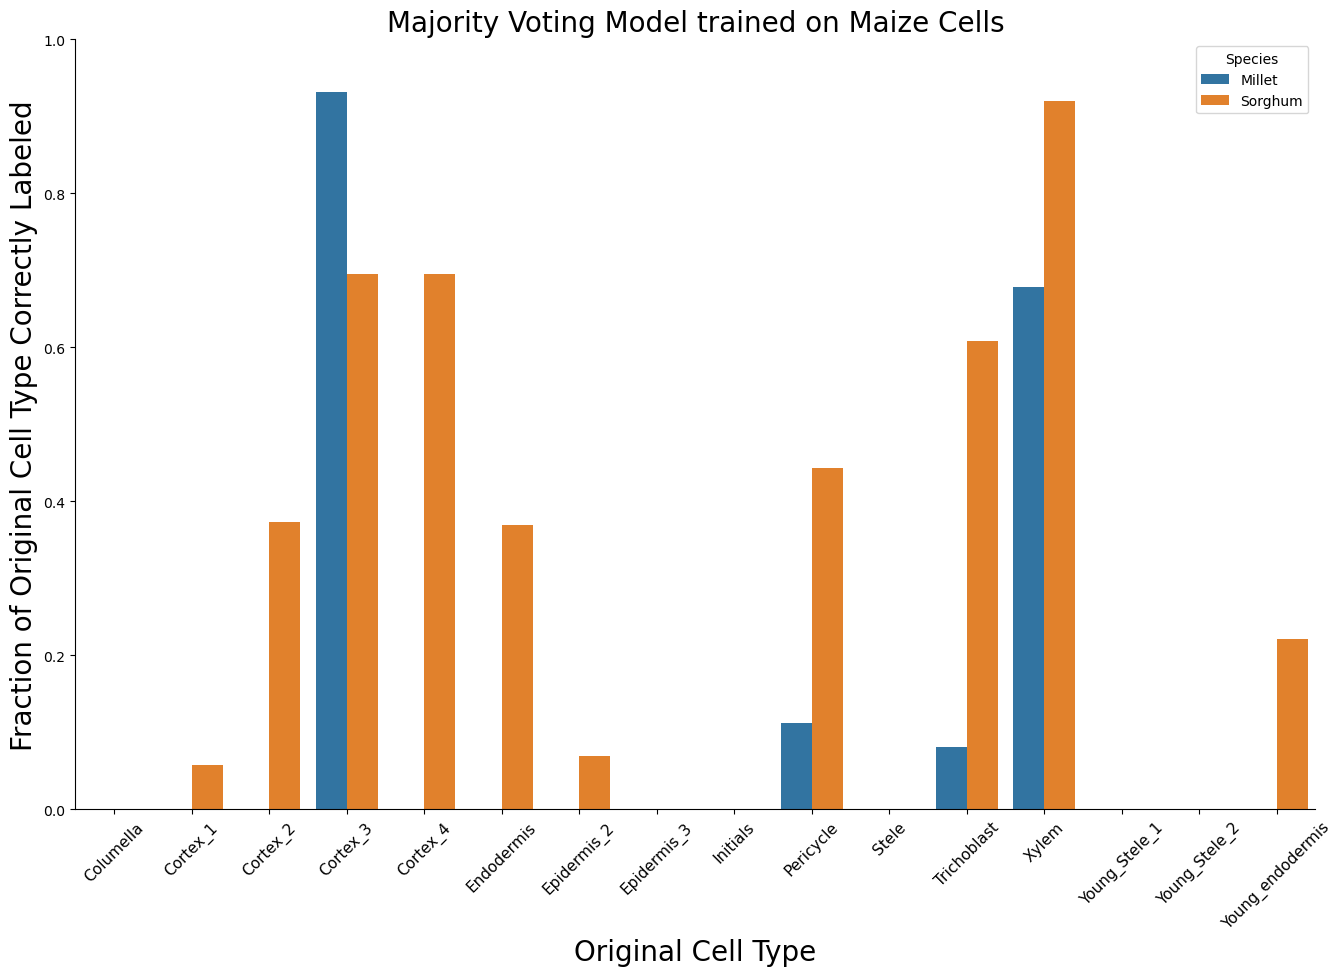

In [82]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.barplot(data = non_maize_results_majority, x = 'Original Cell Type', y = 'Correct Majority Voting Labels', hue = 'Species')
plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("Original Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
plt.ylim((0, 1))
plt.title("Majority Voting Model trained on Maize Cells", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)

In [59]:
non_sorghum_cells_to_train_on = norm_data[norm_data.obs['Species'] != 'Sorghum', :].copy()
sorghum_cells_to_test_on = norm_data[norm_data.obs['Species'] == 'Sorghum', :].copy()
non_sorghum_cells_to_train_on

AnnData object with n_obs × n_vars = 20069 × 56381
    obs: 'Cell Cluster Annotation', 'Species', 'Cluster and Type', 'Cluster and Species', 'Type', 'Type and Species'

In [60]:
non_sorg_model = celltypist.train(non_sorghum_cells_to_train_on, labels = 'Cell Cluster Annotation', n_jobs = 20, feature_selection= True)

🍳 Preparing data before training
✂️ 14119 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
🔎 Selecting features
🧬 2932 features are selected
🏋️ Starting the second round of training
🏋️ Training data using logistic regression
✅ Model training done!


In [62]:
prediction_on_sorg = celltypist.annotate(sorghum_cells_to_test_on, model = non_sorg_model, majority_voting= True)


🔬 Input data has 11130 cells and 56381 genes
🔗 Matching reference genes in the model
🧬 2932 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [66]:
sorghum_cells_to_test_on.obs = sorghum_cells_to_test_on.obs.merge(right = prediction_on_sorg.predicted_labels, left_index= True, right_index= True)
sorghum_cells_to_test_on.obs['Correct Predicted Labels'] = (sorghum_cells_to_test_on.obs['Cell Cluster Annotation'] == sorghum_cells_to_test_on.obs['predicted_labels'])
sorghum_cells_to_test_on.obs['Correct Majority Voting Labels'] = (sorghum_cells_to_test_on.obs['Cell Cluster Annotation'] == sorghum_cells_to_test_on.obs['majority_voting'])
sorg_results_predicted = pd.DataFrame(sorghum_cells_to_test_on.obs.groupby('Cluster and Species')['Correct Predicted Labels'].mean())
sorg_results_predicted = sorg_results_predicted.reset_index()
sorg_results_predicted['Species'] = sorg_results_predicted['Cluster and Species'].str.split(" ").str[1]
sorg_results_predicted['Original Cell Type'] = sorg_results_predicted['Cluster and Species'].str.split(" ").str[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Columella'),
  Text(1, 0, 'Cortex_1'),
  Text(2, 0, 'Cortex_2'),
  Text(3, 0, 'Cortex_3'),
  Text(4, 0, 'Cortex_4'),
  Text(5, 0, 'Endodermis'),
  Text(6, 0, 'Epidermis_2'),
  Text(7, 0, 'Epidermis_3'),
  Text(8, 0, 'Initials'),
  Text(9, 0, 'Pericycle'),
  Text(10, 0, 'Stele'),
  Text(11, 0, 'Trichoblast'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Stele_1'),
  Text(14, 0, 'Young_Stele_2'),
  Text(15, 0, 'Young_endodermis')])

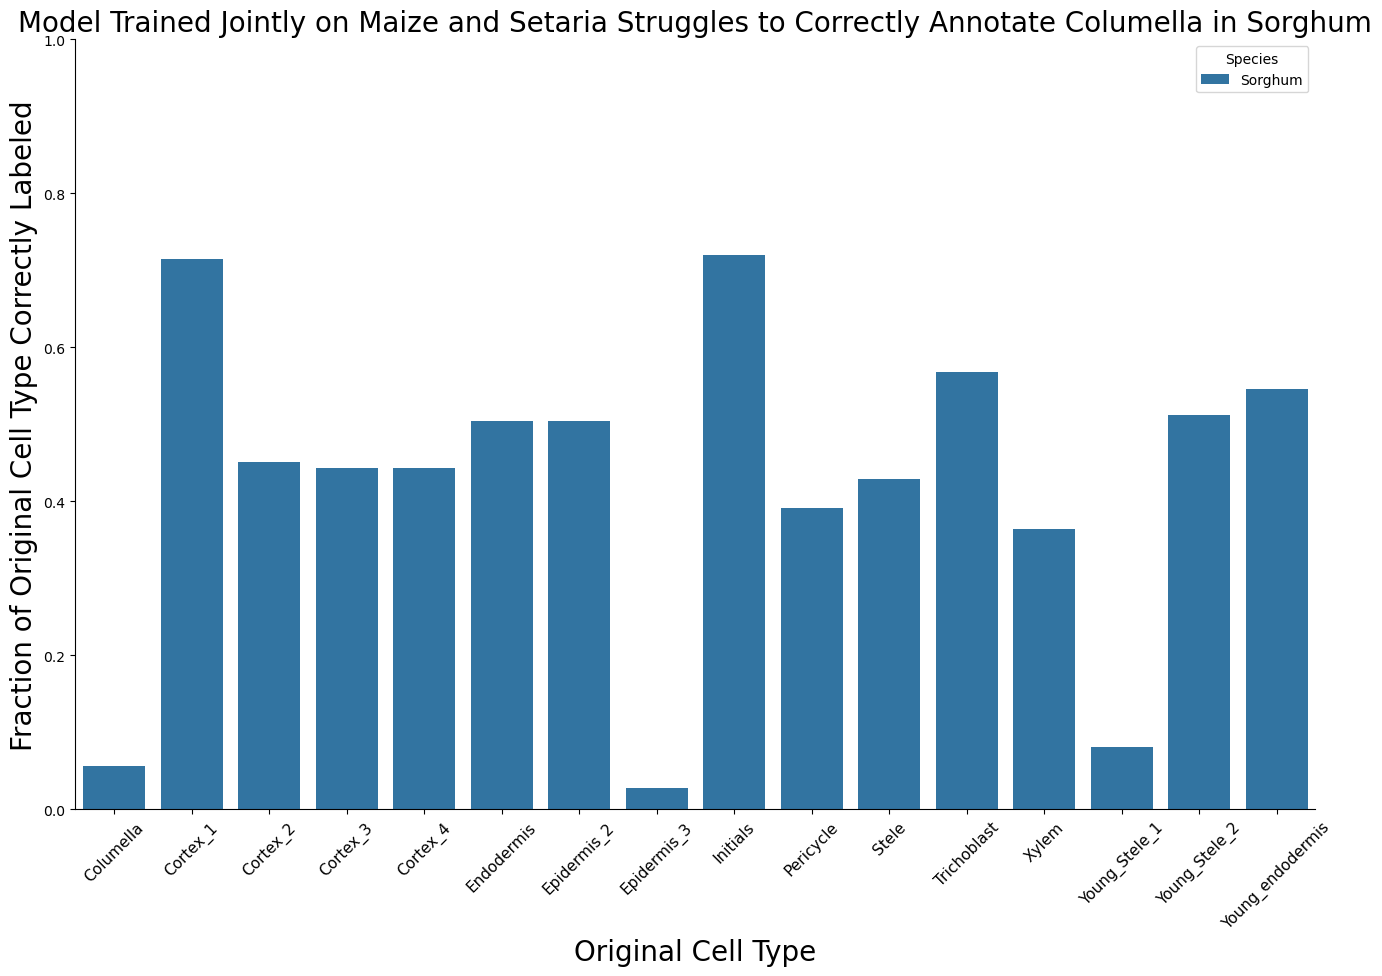

In [83]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.barplot(data = sorg_results_predicted, x = 'Original Cell Type', y = 'Correct Predicted Labels', hue = 'Species')
plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("Original Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
plt.ylim((0, 1))
plt.title("Model Trained Jointly on Maize and Setaria Struggles to Correctly Annotate Columella in Sorghum", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)

In [70]:
sorg_results_majority = pd.DataFrame(sorghum_cells_to_test_on.obs.groupby('Cluster and Species')['Correct Majority Voting Labels'].mean())
sorg_results_majority = sorg_results_majority.reset_index()
sorg_results_majority['Species'] = sorg_results_majority['Cluster and Species'].str.split(" ").str[1]
sorg_results_majority['Original Cell Type'] = sorg_results_majority['Cluster and Species'].str.split(" ").str[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Columella'),
  Text(1, 0, 'Cortex_1'),
  Text(2, 0, 'Cortex_2'),
  Text(3, 0, 'Cortex_3'),
  Text(4, 0, 'Cortex_4'),
  Text(5, 0, 'Endodermis'),
  Text(6, 0, 'Epidermis_2'),
  Text(7, 0, 'Epidermis_3'),
  Text(8, 0, 'Initials'),
  Text(9, 0, 'Pericycle'),
  Text(10, 0, 'Stele'),
  Text(11, 0, 'Trichoblast'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Stele_1'),
  Text(14, 0, 'Young_Stele_2'),
  Text(15, 0, 'Young_endodermis')])

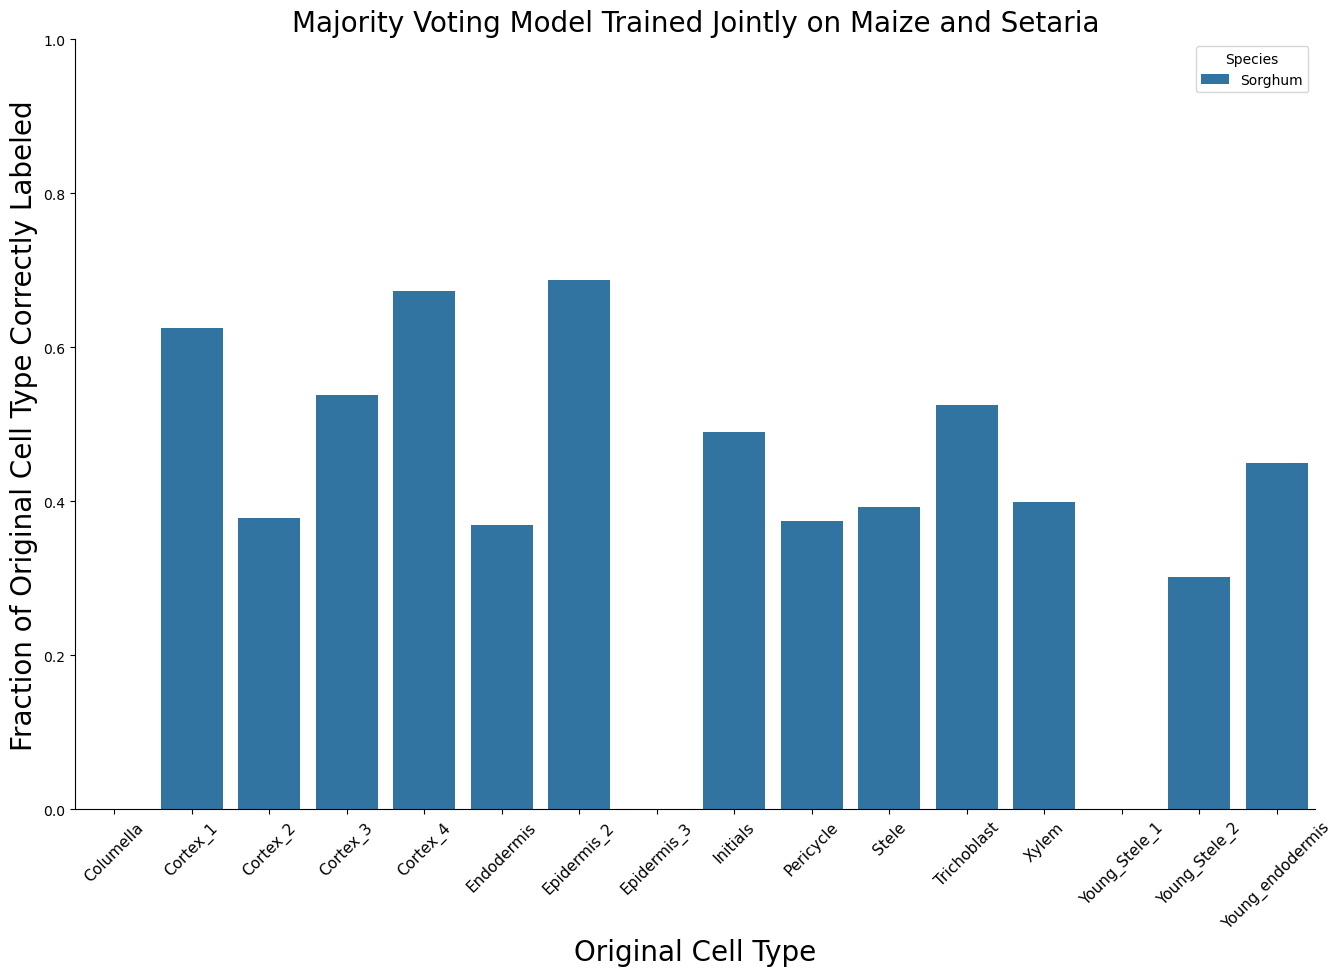

In [84]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.barplot(data = sorg_results_majority, x = 'Original Cell Type', y = 'Correct Majority Voting Labels', hue = 'Species')
plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("Original Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
plt.ylim((0, 1))
plt.title("Majority Voting Model Trained Jointly on Maize and Setaria", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)

In [72]:
non_maize_model = celltypist.train(non_maize_cells_to_test_on, labels = 'Cell Cluster Annotation', n_jobs = 20, feature_selection= True)

🍳 Preparing data before training
✂️ 17061 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
🔎 Selecting features
🧬 2988 features are selected
🏋️ Starting the second round of training
🏋️ Training data using logistic regression
✅ Model training done!


In [73]:
prediction_on_maize = celltypist.annotate(maize_cells_to_train_on, model = non_maize_model, majority_voting= True)


🔬 Input data has 6903 cells and 56381 genes
🔗 Matching reference genes in the model
🧬 2988 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [74]:
maize_cells_to_train_on.obs = maize_cells_to_train_on.obs.merge(right = prediction_on_maize.predicted_labels, left_index= True, right_index= True)
maize_cells_to_train_on.obs['Correct Predicted Labels'] = (maize_cells_to_train_on.obs['Cell Cluster Annotation'] == maize_cells_to_train_on.obs['predicted_labels'])
maize_cells_to_train_on.obs['Correct Majority Voting Labels'] = (maize_cells_to_train_on.obs['Cell Cluster Annotation'] == maize_cells_to_train_on.obs['majority_voting'])
maize_results_predicted = pd.DataFrame(maize_cells_to_train_on.obs.groupby('Cluster and Species')['Correct Predicted Labels'].mean())
maize_results_predicted = maize_results_predicted.reset_index()
maize_results_predicted['Species'] = maize_results_predicted['Cluster and Species'].str.split(" ").str[1]
maize_results_predicted['Original Cell Type'] = maize_results_predicted['Cluster and Species'].str.split(" ").str[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Columella'),
  Text(1, 0, 'Cortex_1'),
  Text(2, 0, 'Cortex_2'),
  Text(3, 0, 'Cortex_3'),
  Text(4, 0, 'Cortex_4'),
  Text(5, 0, 'Endodermis'),
  Text(6, 0, 'Epidermis_2'),
  Text(7, 0, 'Epidermis_3'),
  Text(8, 0, 'Initials'),
  Text(9, 0, 'Pericycle'),
  Text(10, 0, 'Stele'),
  Text(11, 0, 'Trichoblast'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Stele_1'),
  Text(14, 0, 'Young_Stele_2'),
  Text(15, 0, 'Young_endodermis')])

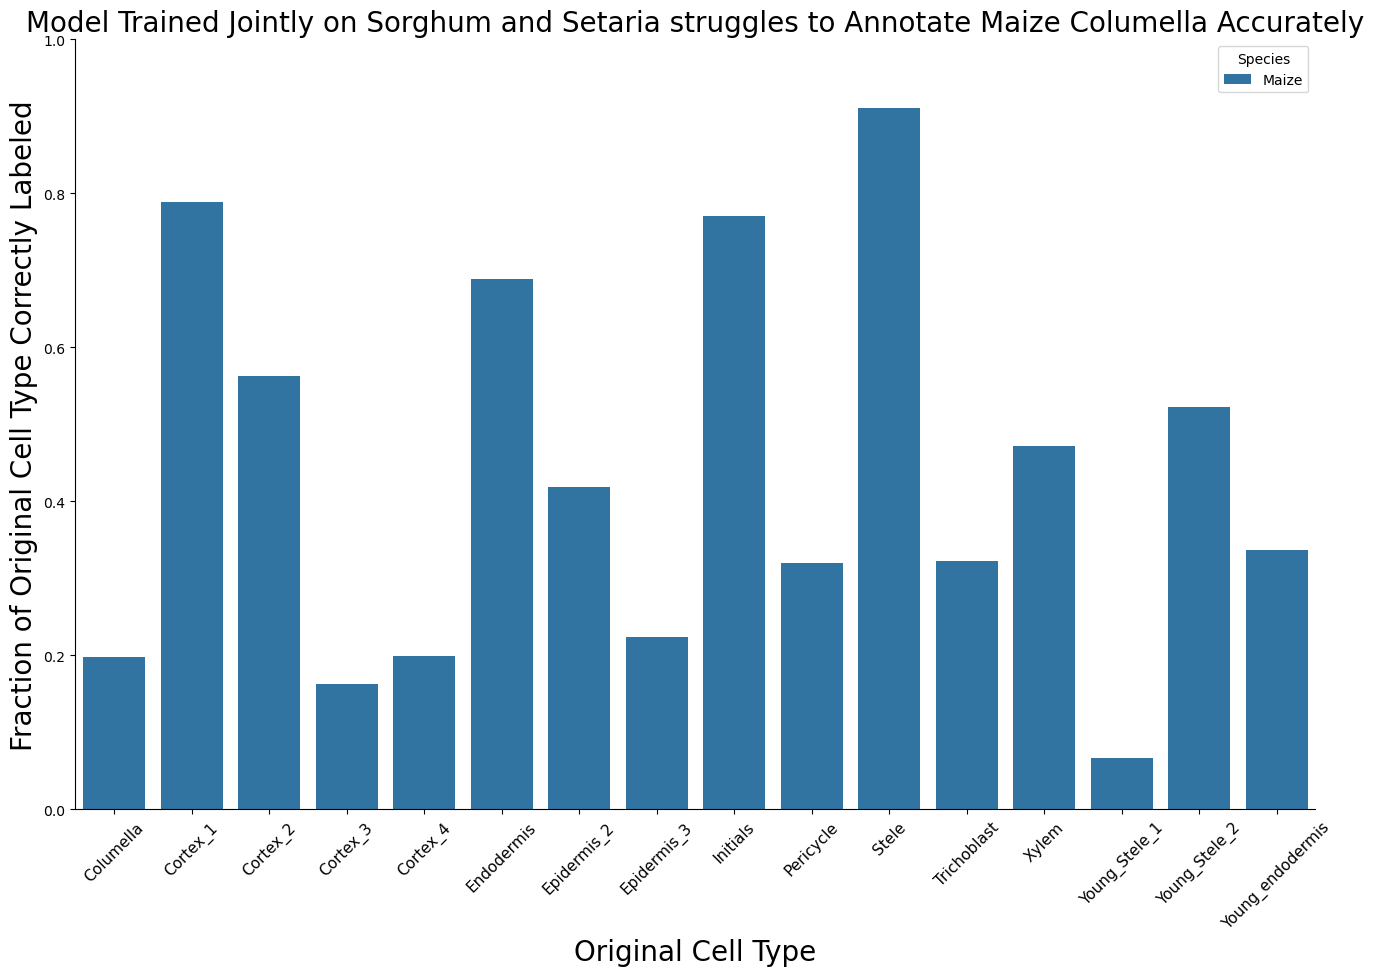

In [85]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.barplot(data = maize_results_predicted, x = 'Original Cell Type', y = 'Correct Predicted Labels', hue = 'Species')
plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("Original Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
plt.ylim((0, 1))
plt.title("Model Trained Jointly on Sorghum and Setaria struggles to Annotate Maize Columella Accurately", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)

In [76]:
maize_results_majority = pd.DataFrame(maize_cells_to_train_on.obs.groupby('Cluster and Species')['Correct Majority Voting Labels'].mean())
maize_results_majority = maize_results_majority.reset_index()
maize_results_majority['Species'] = maize_results_majority['Cluster and Species'].str.split(" ").str[1]
maize_results_majority['Original Cell Type'] = maize_results_majority['Cluster and Species'].str.split(" ").str[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Columella'),
  Text(1, 0, 'Cortex_1'),
  Text(2, 0, 'Cortex_2'),
  Text(3, 0, 'Cortex_3'),
  Text(4, 0, 'Cortex_4'),
  Text(5, 0, 'Endodermis'),
  Text(6, 0, 'Epidermis_2'),
  Text(7, 0, 'Epidermis_3'),
  Text(8, 0, 'Initials'),
  Text(9, 0, 'Pericycle'),
  Text(10, 0, 'Stele'),
  Text(11, 0, 'Trichoblast'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Stele_1'),
  Text(14, 0, 'Young_Stele_2'),
  Text(15, 0, 'Young_endodermis')])

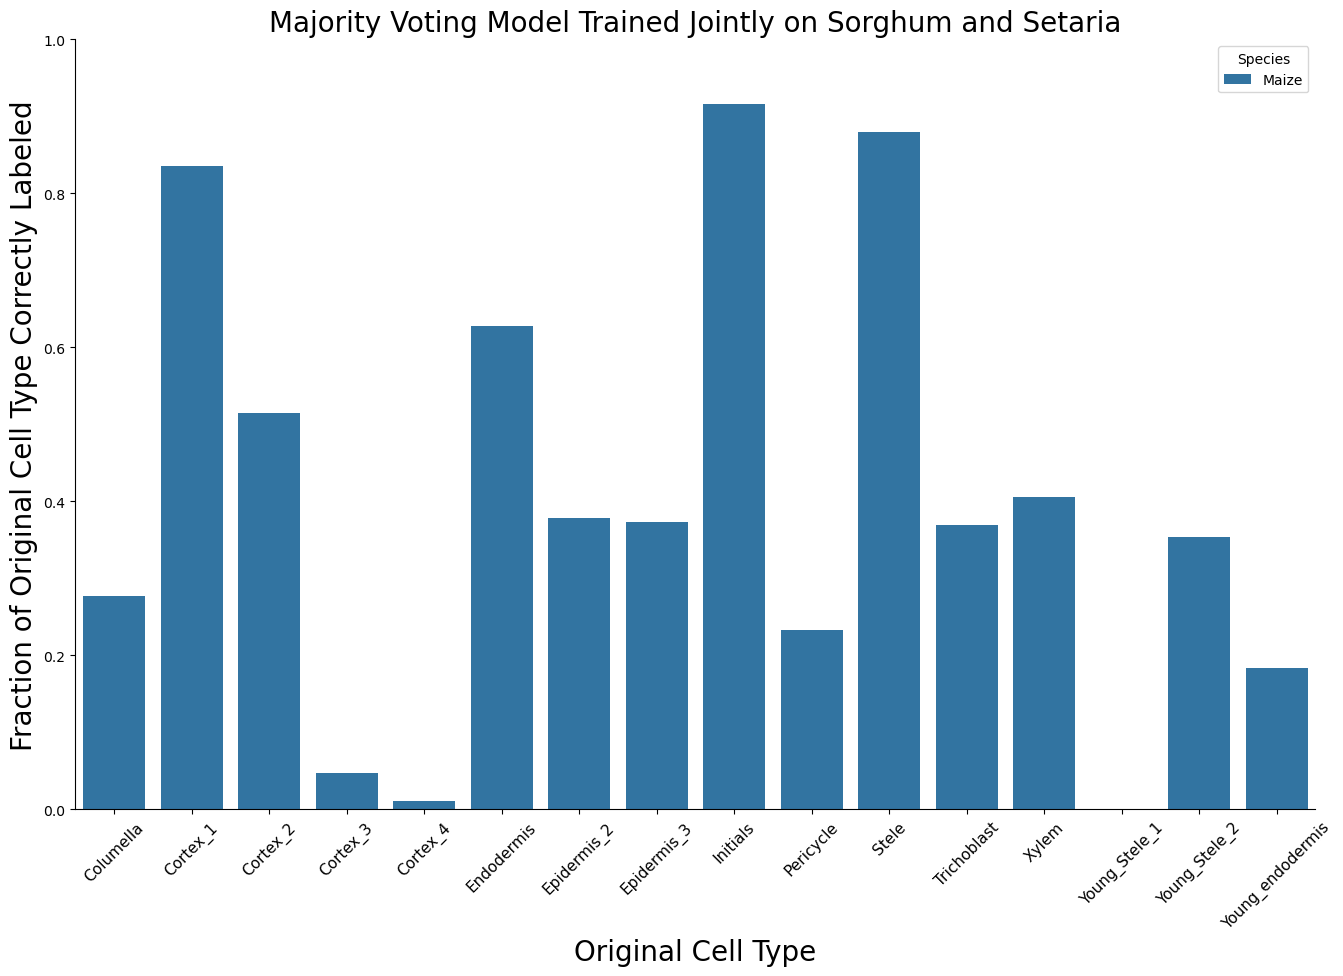

In [86]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.barplot(data = maize_results_majority, x = 'Original Cell Type', y = 'Correct Majority Voting Labels', hue = 'Species')
plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("Original Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
plt.ylim((0, 1))
plt.title("Majority Voting Model Trained Jointly on Sorghum and Setaria", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)

In [6]:
millet_cells_to_train_on = norm_data[norm_data.obs['Species'] == 'Millet', :].copy()
non_millet_cells_to_test_on = norm_data[norm_data.obs['Species'] != 'Millet', :].copy()
millet_cells_to_train_on

AnnData object with n_obs × n_vars = 13166 × 56381
    obs: 'Cell Cluster Annotation', 'Species', 'Cluster and Type', 'Cluster and Species', 'Type', 'Type and Species'

In [7]:
millet_model = celltypist.train(millet_cells_to_train_on, labels = 'Cell Cluster Annotation', n_jobs = 20, feature_selection= True)

🍳 Preparing data before training
✂️ 32315 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
🔎 Selecting features
🧬 3009 features are selected
🏋️ Starting the second round of training
🏋️ Training data using logistic regression
✅ Model training done!


In [8]:
prediction_on_non_millet_cells = celltypist.annotate(non_millet_cells_to_test_on, model = millet_model, majority_voting= True)


🔬 Input data has 18033 cells and 56381 genes
🔗 Matching reference genes in the model
🧬 3009 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [9]:
non_millet_cells_to_test_on.obs = non_millet_cells_to_test_on.obs.merge(right = prediction_on_non_millet_cells.predicted_labels, left_index= True, right_index= True)
non_millet_cells_to_test_on.obs['Correct Predicted Labels'] = (non_millet_cells_to_test_on.obs['Cell Cluster Annotation'] == non_millet_cells_to_test_on.obs['predicted_labels'])
non_millet_cells_to_test_on.obs['Correct Majority Voting Labels'] = (non_millet_cells_to_test_on.obs['Cell Cluster Annotation'] == non_millet_cells_to_test_on.obs['majority_voting'])
non_millet_results_predicted = pd.DataFrame(non_millet_cells_to_test_on.obs.groupby('Cluster and Species')['Correct Predicted Labels'].mean())
non_millet_results_predicted = non_millet_results_predicted.reset_index()
non_millet_results_predicted['Species'] = non_millet_results_predicted['Cluster and Species'].str.split(" ").str[1]
non_millet_results_predicted['Original Cell Type'] = non_millet_results_predicted['Cluster and Species'].str.split(" ").str[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Columella'),
  Text(1, 0, 'Cortex_1'),
  Text(2, 0, 'Cortex_2'),
  Text(3, 0, 'Cortex_3'),
  Text(4, 0, 'Cortex_4'),
  Text(5, 0, 'Endodermis'),
  Text(6, 0, 'Epidermis_2'),
  Text(7, 0, 'Epidermis_3'),
  Text(8, 0, 'Initials'),
  Text(9, 0, 'Pericycle'),
  Text(10, 0, 'Stele'),
  Text(11, 0, 'Trichoblast'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Stele_1'),
  Text(14, 0, 'Young_Stele_2'),
  Text(15, 0, 'Young_endodermis')])

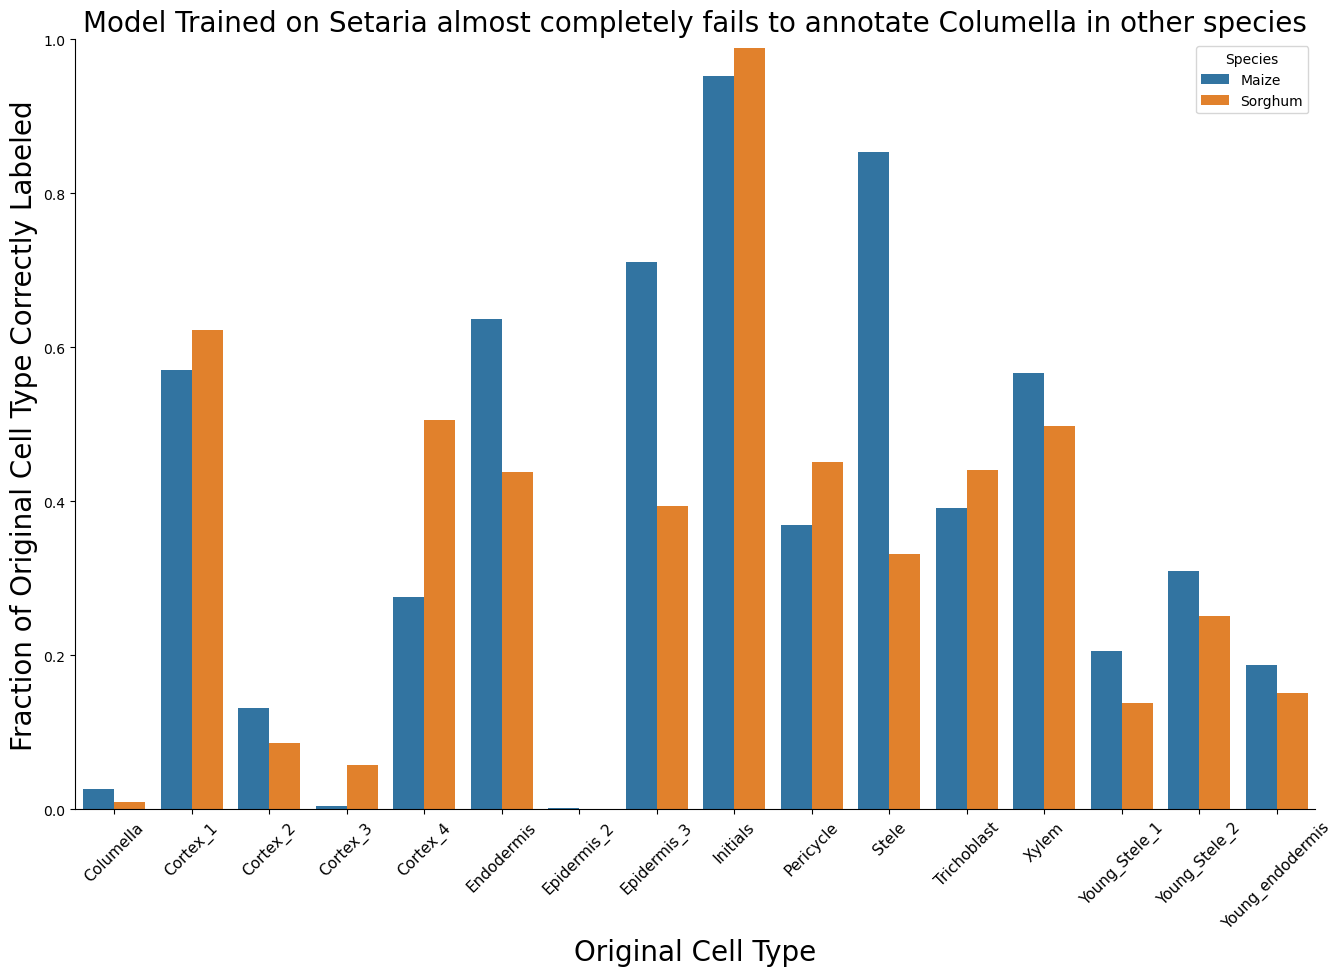

In [10]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.barplot(data = non_millet_results_predicted, x = 'Original Cell Type', y = 'Correct Predicted Labels', hue = 'Species')
plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("Original Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
plt.ylim((0, 1))
plt.title("Model Trained on Setaria almost completely fails to annotate Columella in other species", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)

In [11]:
non_millet_results_majority = pd.DataFrame(non_millet_cells_to_test_on.obs.groupby('Cluster and Species')['Correct Majority Voting Labels'].mean())
non_millet_results_majority = non_millet_results_majority.reset_index()
non_millet_results_majority['Species'] = non_millet_results_majority['Cluster and Species'].str.split(" ").str[1]
non_millet_results_majority['Original Cell Type'] = non_millet_results_majority['Cluster and Species'].str.split(" ").str[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Columella'),
  Text(1, 0, 'Cortex_1'),
  Text(2, 0, 'Cortex_2'),
  Text(3, 0, 'Cortex_3'),
  Text(4, 0, 'Cortex_4'),
  Text(5, 0, 'Endodermis'),
  Text(6, 0, 'Epidermis_2'),
  Text(7, 0, 'Epidermis_3'),
  Text(8, 0, 'Initials'),
  Text(9, 0, 'Pericycle'),
  Text(10, 0, 'Stele'),
  Text(11, 0, 'Trichoblast'),
  Text(12, 0, 'Xylem'),
  Text(13, 0, 'Young_Stele_1'),
  Text(14, 0, 'Young_Stele_2'),
  Text(15, 0, 'Young_endodermis')])

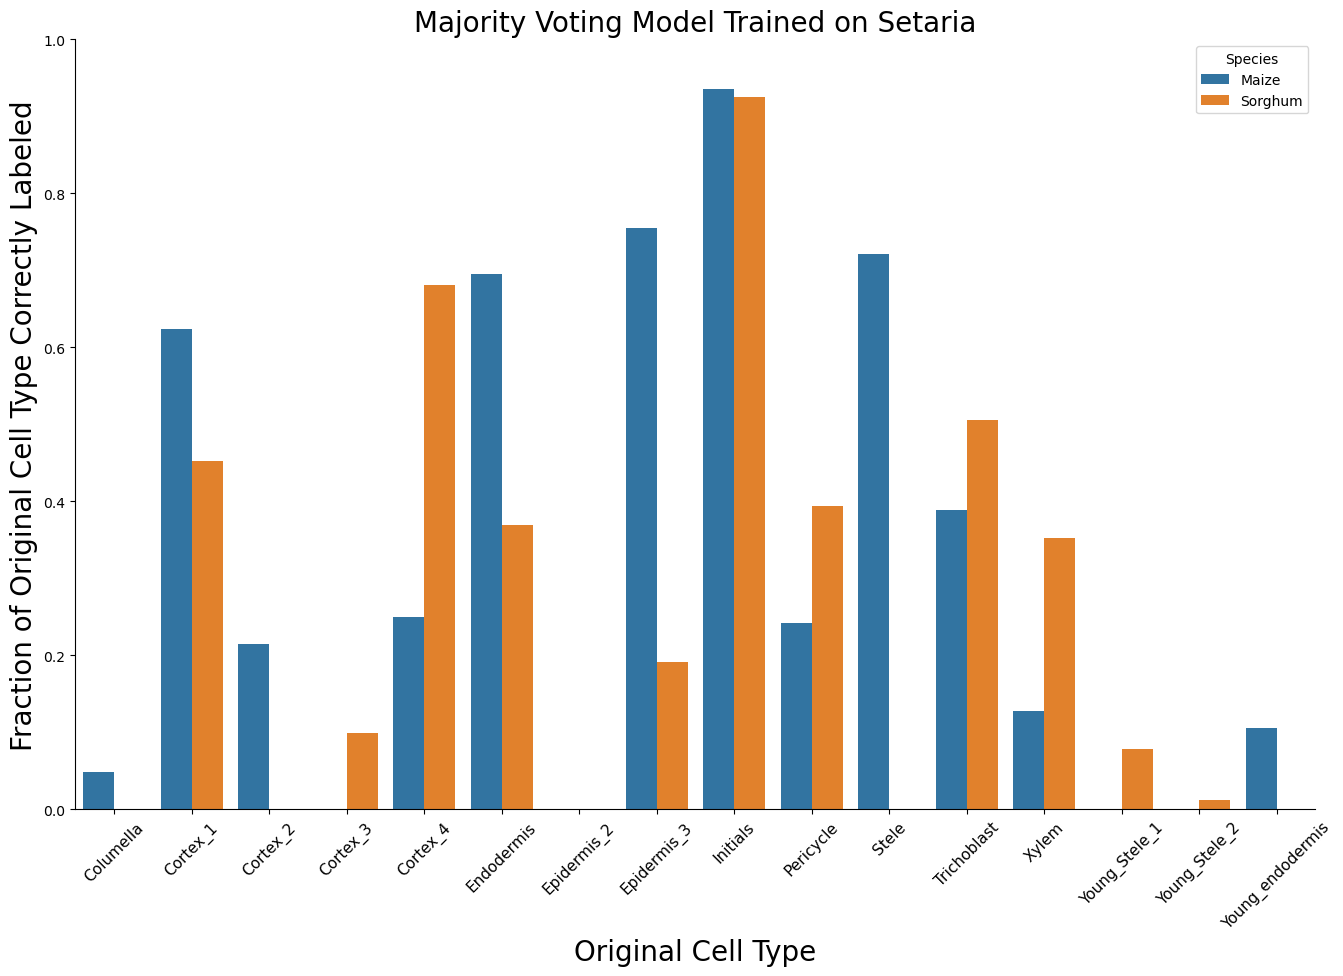

In [12]:
fig, ax = plt.subplots(figsize = (16,10))
fig.patch.set_facecolor('white')
ax = sns.barplot(data = non_millet_results_majority, x = 'Original Cell Type', y = 'Correct Majority Voting Labels', hue = 'Species')
plt.ylabel("Fraction of Original Cell Type Correctly Labeled", fontsize = 20)
plt.xlabel("Original Cell Type", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
# plt.xlim((0,1000))
plt.ylim((0, 1))
plt.title("Majority Voting Model Trained on Setaria", fontsize = 20)
plt.xticks(fontsize = 11, rotation = 45 )
#plt.yticks(fontsize = 11)

In [13]:
metaneighbor_results = pd.read_csv('/data/passala/Generated_Tables/Temp_junk/bruno_metaneighbor_as_csv_for_correlation.csv')
metaneighbor_results

,Unnamed: 0,Cluster 1,Cluster 2,AUROC Between Clusters
0,0,Maize|Columella,Maize|Columella,0.754423
1,1,Maize|Columella,Maize|Cortex_1,0.343062
2,2,Maize|Columella,Maize|Cortex_2,0.382920
3,3,Maize|Columella,Maize|Cortex_3,0.670852
4,4,Maize|Columella,Maize|Cortex_4,0.390484
...,...,...,...,...
1171,1171,Sorghum|Young_Stele_1,Sorghum|Young_Stele_2,0.417623
1172,1172,Sorghum|Young_Stele_1,Sorghum|Young_endodermis,0.523721
1173,1173,Sorghum|Young_Stele_2,Sorghum|Young_Stele_2,0.609806
1174,1174,Sorghum|Young_Stele_2,Sorghum|Young_endodermis,0.451416


In [14]:
non_millet_results_predicted

,Cluster and Species,Correct Predicted Labels,Species,Original Cell Type
0,Columella Maize,0.026432,Maize,Columella
1,Columella Sorghum,0.009070,Sorghum,Columella
2,Cortex_1 Maize,0.571214,Maize,Cortex_1
3,Cortex_1 Sorghum,0.622074,Sorghum,Cortex_1
4,Cortex_2 Maize,0.131667,Maize,Cortex_2
5,Cortex_2 Sorghum,0.086086,Sorghum,Cortex_2
6,Cortex_3 Maize,0.004301,Maize,Cortex_3
7,Cortex_3 Sorghum,0.057567,Sorghum,Cortex_3
8,Cortex_4 Maize,0.275735,Maize,Cortex_4
9,Cortex_4 Sorghum,0.506234,Sorghum,Cortex_4


In [24]:
maize_correlation_panda_predicted= non_millet_results_predicted.loc[non_millet_results_predicted['Species'] == "Maize"]
maize_correlation_panda_predicted = maize_correlation_panda_predicted.reset_index(drop = True)
maize_correlation_panda_predicted


,Cluster and Species,Correct Predicted Labels,Species,Original Cell Type
0,Columella Maize,0.026432,Maize,Columella
1,Cortex_1 Maize,0.571214,Maize,Cortex_1
2,Cortex_2 Maize,0.131667,Maize,Cortex_2
3,Cortex_3 Maize,0.004301,Maize,Cortex_3
4,Cortex_4 Maize,0.275735,Maize,Cortex_4
5,Endodermis Maize,0.636923,Maize,Endodermis
6,Epidermis_2 Maize,0.001802,Maize,Epidermis_2
7,Epidermis_3 Maize,0.710623,Maize,Epidermis_3
8,Initials Maize,0.951807,Maize,Initials
9,Pericycle Maize,0.369106,Maize,Pericycle


In [50]:
ordered_metaneighbor_results = []
for celltype in maize_correlation_panda_predicted['Original Cell Type']:
    target_maize_cluster = 'Maize'+ '|' + celltype
    target_millet_cluster = 'Millet' +'|' + celltype
    if len(metaneighbor_results.loc[(metaneighbor_results['Cluster 1'] == target_maize_cluster) &(metaneighbor_results['Cluster 2'] == target_millet_cluster)]) == 1:
        metaneighbor_result = metaneighbor_results['AUROC Between Clusters'].loc[(metaneighbor_results['Cluster 1'] == target_maize_cluster) &(metaneighbor_results['Cluster 2'] == target_millet_cluster)].item()
    elif len(metaneighbor_results.loc[(metaneighbor_results['Cluster 1'] == target_millet_cluster) &(metaneighbor_results['Cluster 2'] == target_maize_cluster)]) == 1:
        metaneighbor_result = metaneighbor_results['AUROC Between Clusters'].loc[(metaneighbor_results['Cluster 1'] == target_millet_cluster) &(metaneighbor_results['Cluster 2'] == target_maize_cluster)].item()
    else:
        raise Exception("Missing Pair")
    ordered_metaneighbor_results.append(metaneighbor_result)

In [51]:
maize_correlation_panda_predicted['Metaneighbor Results'] = ordered_metaneighbor_results
maize_correlation_panda_predicted

,Cluster and Species,Correct Predicted Labels,Species,Original Cell Type,Metaneighbor Results
0,Columella Maize,0.026432,Maize,Columella,0.438205
1,Cortex_1 Maize,0.571214,Maize,Cortex_1,0.801421
2,Cortex_2 Maize,0.131667,Maize,Cortex_2,0.660947
3,Cortex_3 Maize,0.004301,Maize,Cortex_3,0.554506
4,Cortex_4 Maize,0.275735,Maize,Cortex_4,0.723086
5,Endodermis Maize,0.636923,Maize,Endodermis,0.706631
6,Epidermis_2 Maize,0.001802,Maize,Epidermis_2,0.811185
7,Epidermis_3 Maize,0.710623,Maize,Epidermis_3,0.826068
8,Initials Maize,0.951807,Maize,Initials,0.857473
9,Pericycle Maize,0.369106,Maize,Pericycle,0.653574


In [52]:
maize_correlation_panda_predicted['Correct Predicted Labels'].corr(maize_correlation_panda_predicted['Metaneighbor Results'], method = 'pearson')
#maize_correlation_panda_predicted['Correct Predicted Labels'].corr(maize_correlation_panda_predicted['Metaneighbor Results'], method = 'spearman')

0.4801687228428811

In [35]:
maize_correlation_panda_majority= non_millet_results_majority.loc[non_millet_results_majority['Species'] == "Maize"]
maize_correlation_panda_majority = maize_correlation_panda_majority.reset_index(drop = True)
ordered_metaneighbor_results = []
for celltype in maize_correlation_panda_majority['Original Cell Type']:
    target_maize_cluster = 'Maize'+ '|' + celltype
    target_millet_cluster = 'Millet' +'|' + celltype
    if len(metaneighbor_results.loc[(metaneighbor_results['Cluster 1'] == target_maize_cluster) &(metaneighbor_results['Cluster 2'] == target_millet_cluster)]) == 1:
        metaneighbor_result = metaneighbor_results['AUROC Between Clusters'].loc[(metaneighbor_results['Cluster 1'] == target_maize_cluster) &(metaneighbor_results['Cluster 2'] == target_millet_cluster)].item()
    elif len(metaneighbor_results.loc[(metaneighbor_results['Cluster 1'] == target_millet_cluster) &(metaneighbor_results['Cluster 2'] == target_maize_cluster)]) == 1:
        metaneighbor_result = metaneighbor_results['AUROC Between Clusters'].loc[(metaneighbor_results['Cluster 1'] == target_millet_cluster) &(metaneighbor_results['Cluster 2'] == target_maize_cluster)].item()
    else:
        raise Exception("Missing Pair")
    ordered_metaneighbor_results.append(metaneighbor_result)
maize_correlation_panda_majority['Metaneighbor Results'] = ordered_metaneighbor_results
maize_correlation_panda_majority

,Cluster and Species,Correct Majority Voting Labels,Species,Original Cell Type,Metaneighbor Results
0,Columella Maize,0.048458,Maize,Columella,0.438205
1,Cortex_1 Maize,0.623688,Maize,Cortex_1,0.801421
2,Cortex_2 Maize,0.215000,Maize,Cortex_2,0.660947
3,Cortex_3 Maize,0.000000,Maize,Cortex_3,0.554506
4,Cortex_4 Maize,0.250000,Maize,Cortex_4,0.723086
5,Endodermis Maize,0.695385,Maize,Endodermis,0.706631
6,Epidermis_2 Maize,0.000000,Maize,Epidermis_2,0.811185
7,Epidermis_3 Maize,0.754579,Maize,Epidermis_3,0.826068
8,Initials Maize,0.935743,Maize,Initials,0.857473
9,Pericycle Maize,0.242276,Maize,Pericycle,0.653574


In [39]:
maize_correlation_panda_majority['Correct Majority Voting Labels'].corr(maize_correlation_panda_majority['Metaneighbor Results'], method = 'pearson')
#maize_correlation_panda_majority['Correct Majority Voting Labels'].corr(maize_correlation_panda_majority['Metaneighbor Results'], method = 'spearman')

0.4583172737791177

In [53]:
sorghum_correlation_panda_majority= non_millet_results_majority.loc[non_millet_results_majority['Species'] == "Sorghum"]
sorghum_correlation_panda_majority = sorghum_correlation_panda_majority.reset_index(drop = True)
ordered_metaneighbor_results = []
for celltype in sorghum_correlation_panda_majority['Original Cell Type']:
    target_sorghum_cluster = 'Sorghum'+ '|' + celltype
    target_millet_cluster = 'Millet' +'|' + celltype
    if len(metaneighbor_results.loc[(metaneighbor_results['Cluster 1'] == target_sorghum_cluster) &(metaneighbor_results['Cluster 2'] == target_millet_cluster)]) == 1:
        metaneighbor_result = metaneighbor_results['AUROC Between Clusters'].loc[(metaneighbor_results['Cluster 1'] == target_sorghum_cluster) &(metaneighbor_results['Cluster 2'] == target_millet_cluster)].item()
    elif len(metaneighbor_results.loc[(metaneighbor_results['Cluster 1'] == target_millet_cluster) &(metaneighbor_results['Cluster 2'] == target_sorghum_cluster)]) == 1:
        metaneighbor_result = metaneighbor_results['AUROC Between Clusters'].loc[(metaneighbor_results['Cluster 1'] == target_millet_cluster) &(metaneighbor_results['Cluster 2'] == target_sorghum_cluster)].item()
    else:
        raise Exception("Missing Pair")
    ordered_metaneighbor_results.append(metaneighbor_result)
sorghum_correlation_panda_majority['Metaneighbor Results'] = ordered_metaneighbor_results
sorghum_correlation_panda_majority

,Cluster and Species,Correct Majority Voting Labels,Species,Original Cell Type,Metaneighbor Results
0,Columella Sorghum,0.000000,Sorghum,Columella,0.537007
1,Cortex_1 Sorghum,0.452620,Sorghum,Cortex_1,0.715985
2,Cortex_2 Sorghum,0.000000,Sorghum,Cortex_2,0.647974
3,Cortex_3 Sorghum,0.099350,Sorghum,Cortex_3,0.612089
4,Cortex_4 Sorghum,0.680798,Sorghum,Cortex_4,0.770103
5,Endodermis Sorghum,0.368644,Sorghum,Endodermis,0.610686
6,Epidermis_2 Sorghum,0.000000,Sorghum,Epidermis_2,0.745352
7,Epidermis_3 Sorghum,0.190909,Sorghum,Epidermis_3,0.803727
8,Initials Sorghum,0.925054,Sorghum,Initials,0.827904
9,Pericycle Sorghum,0.393715,Sorghum,Pericycle,0.674887


In [57]:
sorghum_correlation_panda_majority['Correct Majority Voting Labels'].corr(sorghum_correlation_panda_majority['Metaneighbor Results'], method = 'pearson')
#sorghum_correlation_panda_majority['Correct Majority Voting Labels'].corr(sorghum_correlation_panda_majority['Metaneighbor Results'], method = 'spearman')

0.565360451224563

In [58]:
sorghum_correlation_panda_predicted= non_millet_results_predicted.loc[non_millet_results_predicted['Species'] == "Sorghum"]
sorghum_correlation_panda_predicted = sorghum_correlation_panda_predicted.reset_index(drop = True)
ordered_metaneighbor_results = []
for celltype in sorghum_correlation_panda_predicted['Original Cell Type']:
    target_sorghum_cluster = 'Sorghum'+ '|' + celltype
    target_millet_cluster = 'Millet' +'|' + celltype
    if len(metaneighbor_results.loc[(metaneighbor_results['Cluster 1'] == target_sorghum_cluster) &(metaneighbor_results['Cluster 2'] == target_millet_cluster)]) == 1:
        metaneighbor_result = metaneighbor_results['AUROC Between Clusters'].loc[(metaneighbor_results['Cluster 1'] == target_sorghum_cluster) &(metaneighbor_results['Cluster 2'] == target_millet_cluster)].item()
    elif len(metaneighbor_results.loc[(metaneighbor_results['Cluster 1'] == target_millet_cluster) &(metaneighbor_results['Cluster 2'] == target_sorghum_cluster)]) == 1:
        metaneighbor_result = metaneighbor_results['AUROC Between Clusters'].loc[(metaneighbor_results['Cluster 1'] == target_millet_cluster) &(metaneighbor_results['Cluster 2'] == target_sorghum_cluster)].item()
    else:
        raise Exception("Missing Pair")
    ordered_metaneighbor_results.append(metaneighbor_result)
sorghum_correlation_panda_predicted['Metaneighbor Results'] = ordered_metaneighbor_results
sorghum_correlation_panda_predicted

,Cluster and Species,Correct Predicted Labels,Species,Original Cell Type,Metaneighbor Results
0,Columella Sorghum,0.009070,Sorghum,Columella,0.537007
1,Cortex_1 Sorghum,0.622074,Sorghum,Cortex_1,0.715985
2,Cortex_2 Sorghum,0.086086,Sorghum,Cortex_2,0.647974
3,Cortex_3 Sorghum,0.057567,Sorghum,Cortex_3,0.612089
4,Cortex_4 Sorghum,0.506234,Sorghum,Cortex_4,0.770103
5,Endodermis Sorghum,0.438559,Sorghum,Endodermis,0.610686
6,Epidermis_2 Sorghum,0.001074,Sorghum,Epidermis_2,0.745352
7,Epidermis_3 Sorghum,0.393939,Sorghum,Epidermis_3,0.803727
8,Initials Sorghum,0.989293,Sorghum,Initials,0.827904
9,Pericycle Sorghum,0.451017,Sorghum,Pericycle,0.674887


In [60]:
#sorghum_correlation_panda_predicted['Correct Predicted Labels'].corr(sorghum_correlation_panda_predicted['Metaneighbor Results'], method = 'pearson')
sorghum_correlation_panda_predicted['Correct Predicted Labels'].corr(sorghum_correlation_panda_predicted['Metaneighbor Results'], method = 'spearman')

0.5617647058823529